In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#设置全局字体为新罗马
plt.rc('font',family='Times New Roman') 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import OrderedDict
from sklearn.model_selection import train_test_split
import pandas as pd

#计时
from time import time

#线性模型
from sklearn.linear_model import Ridge

#集成树
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#支持向量机
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

#评估指标
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import KFold

# 忽略警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
pri_feature = pd.read_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\pri_feature.xlsx",index_col = 0)

In [3]:
atom_feature = pri_feature.iloc[[2,4,5,8,11,13,16,20,23,25],0:11]

In [4]:
gas_feature =  pri_feature.iloc[0:4,13:24]

In [5]:
gas_feature.index = ["CO","H2S","CH4","C2H6"]

In [6]:
#合并成数据

_ = gas_feature
for i in range(1,10):
    gas_feature = pd.concat([gas_feature,_])

_ = pd.DataFrame()

for i in range(10):
    temp1 = atom_feature.iloc[[i]]    
    temp2 = pd.concat([temp1,temp1])
    temp3 = pd.concat([temp2,temp2])
    _ = pd.concat([_,temp3])
atom_feature = _

#更新索引
gas_feature.index = atom_feature.index+"+"+gas_feature.index
atom_feature.index = gas_feature.index
df = pd.concat([atom_feature,gas_feature],axis=1)

In [7]:
ade = pri_feature[["ade"]] 
ade.index = df.index

In [8]:
#到这里已经处理好数据了，df为X ade为y
#接下来就开始处理df的特征
#由于ade与df分开，这里使用临时变量
_ = pd.concat([df,ade],axis=1)

In [9]:
_.to_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\df.xlsx")
_.corr().to_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\corr.xlsx")

In [10]:
#根据相关系数删除特征
df.drop(["ed","M","rg","Ng","eg","Ag","Nmg"], axis=1, inplace=True) 

In [11]:
#过滤特征之后，开始对整个特征进行归一化处理
atom_feature = pri_feature.iloc[[i for i in range(0,26)],0:11]
gas_feature =  pri_feature.iloc[0:4,13:24]
gas_feature.index = ["CO","H2S","CH4","C2H6"]
#合并成数据

_ = gas_feature
for i in range(1,26):
    gas_feature = pd.concat([gas_feature,_])

_ = pd.DataFrame()

for i in range(26):
    temp1 = atom_feature.iloc[[i]]    
    temp2 = pd.concat([temp1,temp1])
    temp3 = pd.concat([temp2,temp2])
    _ = pd.concat([_,temp3])
atom_feature = _

#更新索引
gas_feature.index = atom_feature.index+"+"+gas_feature.index
atom_feature.index = gas_feature.index
df = pd.concat([atom_feature,gas_feature],axis=1)
df.drop(["ed","M","rg","Ng","eg","Ag","Nmg"], axis=1, inplace=True)
ade = pri_feature[["ade"]] 

In [12]:
#得到X和y，分别进行归一化处理
from sklearn import preprocessing

#先保存用来逆转归一化的值
import copy
X =  copy.deepcopy(df).values
y =  copy.deepcopy(ade).values
#归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[list(df.columns)] = scaler.fit_transform(df[list(df.columns)])
ade[list(ade.columns)] = scaler.fit_transform(ade[list(ade.columns)])

In [13]:
#定义预测函数，主要用来逆转归一化
def model_predict(model,y,X_data,y_data):
    result = model.predict(X_data)
    y_pred = result*(y.max()-y.min())+y.min()
    y_pred = y_pred.reshape(-1)
    y_real = y_data*(y.max()-y.min())+y.min()
    return y_real,y_pred


In [14]:
#根据逆转后的真实值，可以定义模型评价函数
from sklearn.metrics import r2_score, mean_squared_error
def compute_r2_and_rmse(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2,rmse

In [15]:
#现在df为104个特征，需要将df划分为40+64个
#先给出40个的索引，[2,4,5,8,11,13,16,20,23,25]转化40个索引应该为
_ = [2,4,5,8,11,13,16,20,23,25]

#__为四十个df的索引
__ = [4*i+j for i in _ for j in range(4) ]
df1 = df.iloc[__,:]

#___为64个的索引
___ = [i for i in range(104) if i not in __]
df2 = df.iloc[___,:]


In [16]:
#然后df1和ade形成机器学习训练数据
ade.index = df1.index

In [17]:
#处理后用于ML训练的特征如下
df1

,rM,Nm,Im,dc,Am,Im3,bp,Lmin,de,Mg,Ig,rNg,MNg,ve,ge
V+CO,0.414286,0.359649,0.165721,0.846743,0.246241,0.738233,0.533173,0.168831,0.261649,0.354309,1.000000,1.000000,0.663617,0.333333,0.889344
V+H2S,0.414286,0.359649,0.165721,0.846743,0.246241,0.738233,0.533173,0.168831,0.261649,1.000000,0.914327,0.455667,1.000000,0.000000,1.000000
V+CH4,0.414286,0.359649,0.165721,0.846743,0.246241,0.738233,0.533173,0.168831,0.261649,0.000000,0.000000,0.000000,0.000000,0.000000,0.564549
V+C2H6,0.414286,0.359649,0.165721,0.846743,0.246241,0.738233,0.533173,0.168831,0.261649,0.000000,0.000000,0.177667,0.666057,1.000000,0.000000
Mn+CO,0.271429,0.289474,0.382483,0.542146,0.000000,0.847219,0.246124,0.064935,0.362903,0.354309,1.000000,1.000000,0.663617,0.333333,0.889344
Mn+H2S,0.271429,0.289474,0.382483,0.542146,0.000000,0.847219,0.246124,0.064935,0.362903,1.000000,0.914327,0.455667,1.000000,0.000000,1.000000
Mn+CH4,0.271429,0.289474,0.382483,0.542146,0.000000,0.847219,0.246124,0.064935,0.362903,0.000000,0.000000,0.000000,0.000000,0.000000,0.564549
Mn+C2H6,0.271429,0.289474,0.382483,0.542146,0.000000,0.847219,0.246124,0.064935,0.362903,0.000000,0.000000,0.177667,0.666057,1.000000,0.000000
Fe+CO,0.200000,0.535088,0.530246,0.613027,0.076598,0.771457,0.416732,0.129870,0.405914,0.354309,1.000000,1.000000,0.663617,0.333333,0.889344
Fe+H2S,0.200000,0.535088,0.530246,0.613027,0.076598,0.771457,0.416732,0.129870,0.405914,1.000000,0.914327,0.455667,1.000000,0.000000,1.000000


In [18]:
#处理后用于ML训练的目标值
ade

,ade
V+CO,0.245509
V+H2S,0.607784
V+CH4,0.841317
V+C2H6,0.805389
Mn+CO,0.077844
Mn+H2S,0.458084
Mn+CH4,0.739521
Mn+C2H6,0.733533
Fe+CO,0.212575
Fe+H2S,0.691617


In [19]:
#生成模型
svr = SVR(kernel = "rbf",C = 1)


RFR = RandomForestRegressor(n_estimators=300 
                            ,max_depth = 10
                            ,max_features = 11
                            )
from sklearn.linear_model import Ridge
Rge = Ridge(alpha = 0.11)

import xgboost as xgb
# 定义XGBoost模型
xgb = xgb.XGBRegressor(
    n_estimators=300
    ,eta =0.5
    ,max_depth = 3
    )
GBR = GradientBoostingRegressor(n_estimators=300
                                ,max_depth = 3
                                ,max_features = 4
                                
                               )


In [20]:
#单次支持向量5折交叉验证 
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
          )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        # 训练模型
        svr.fit(X_train,y_train)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(svr,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(svr,y,X_test,y_test) 
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

0.9151310456566589 0.2680077867747234 0.7611707594777444 0.4219836805910623


In [21]:
#单次RFR5折交叉验证 
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
          )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        # 训练模型
        RFR.fit(X_train,y_train)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(RFR,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(RFR,y,X_test,y_test) 
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

0.9746710782403929 0.1455880489427847 0.7998116063444896 0.3513530960416099


In [22]:
#单次Ridge5折交叉验证 
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
          )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        # 训练模型
        Rge.fit(X_train,y_train)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(Rge,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(Rge,y,X_test,y_test) 
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

0.9184228676174356 0.26130267446311833 0.8533614377741923 0.32692886287836465


In [23]:
#单次XGB5折交叉验证 
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
          )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        # 训练模型
        xgb.fit(X_train,y_train)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(xgb,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(xgb,y,X_test,y_test) 
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

0.9998878317500802 0.009728790691578722 0.8230421090516243 0.35865312922259684


In [24]:
#单次GBR5折交叉验证 
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
          )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        # 训练模型
        GBR.fit(X_train,y_train)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(GBR,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(GBR,y,X_test,y_test) 
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

0.9999999496933043 0.0001728958468503777 0.8716981357405839 0.29196947406738927


In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.initializers import RandomNormal
bpnn = keras.Sequential([
    keras.Input(shape = (16))
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                        ,kernel_initializer = RandomNormal(seed = 123)
                       )
    ,keras.layers.Dropout(0.1)
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                       )
    ,keras.layers.Dense(1)
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                       )
    ,keras.layers.Dense(1)
])
adam = keras.optimizers.Adam(learning_rate = 0.001)
bpnn.compile(loss = "mse",optimizer = adam)
history = keras.callbacks.History()

In [26]:
#然后拟合神经网络，对神经网络执行一次交叉验证
kf = KFold(n_splits=5
              ,shuffle=True
              ,random_state = 42
              )  
#保存R2和RMSE
train_ = []
train__ = []
test_ = []
test__ = []
#保存交叉验证的测试集的结果
#这个fold_test在后续并没有被使用，本来打算作图，但后续放弃了这个图的制作
fold_test= []
# 执行交叉验证并获取每次划分的索引
for i,(train_index, test_index) in enumerate(kf.split(df1)):
        #print(f"Fold {i+1}:")
        #print("Train Index:", train_index)
        #print("Test Index:", test_index)
        X_train= df1.iloc[train_index,:]
        X_test =  df1.iloc[test_index,:]
        y_train = ade.iloc[train_index,:]
        y_test = ade.iloc[test_index,:]
        
        
        #神经网络这里需要重新加载一下模型
        bpnn = keras.Sequential([
            keras.Input(shape = (15))
            ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                        ,kernel_initializer = RandomNormal(seed = 123)
                       )
            ,keras.layers.Dropout(0.01)
            ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                       )
            ,keras.layers.Dropout(0.01)
            ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
                       )
            ,keras.layers.Dropout(0.01)
            ,keras.layers.Dense(1)
            ])
        adam = keras.optimizers.Adam(learning_rate = 0.001)
        bpnn.compile(loss = "mse",optimizer = adam)
        history = keras.callbacks.History()
        # 训练模型
        bpnn.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 2000,callbacks = [history],verbose = 0)
        #输出真实值和预测值，这里是已经逆转归一化的预测值
        y_real_train,y_pred_train = model_predict(bpnn,y,X_train,y_train)
        y_real_test,y_pred_test = model_predict(bpnn,y,X_test,y_test)
        fold_i = model_predict(bpnn,y,X_test,y_test)
        fold_test.append(fold_i)
        #输出模型评价
        evalue_train = compute_r2_and_rmse(y_real_train,y_pred_train)
        evalue_test = compute_r2_and_rmse(y_real_test,y_pred_test)
        #print("training_r2:%.2f,rmse:%.2f"%(evalue_train[0],evalue_train[1]))
        #print("testing_r2:%.2f,rmse:%.2f"%(evalue_test[0],evalue_test[1]))
        train_.append(evalue_train[0])
        train__.append(evalue_train[1])
        test_.append(evalue_test[0])
        test__.append(evalue_test[1])
print(np.mean(train_),np.mean(train__),np.mean(test_),np.mean(test__))

1/1 [==============================] - 0s 21ms/step
0.9968721107001025 0.05123580095488793 0.921088878952062 0.23438128602674269


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.initializers import RandomNormal
bpnn = keras.Sequential([
    keras.Input(shape = (15))
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)

                       )
    ,keras.layers.Dropout(0.01)
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
           
                       )
    ,keras.layers.Dropout(0.01)
    ,keras.layers.Dense(300
                        ,activation = "relu"
                        ,kernel_regularizer = keras.regularizers.l2(0.001)
            
                       )
    ,keras.layers.Dropout(0.01)

    ,keras.layers.Dense(1)
])
adam = keras.optimizers.Adam(learning_rate = 0.001)
bpnn.compile(loss = "mse",optimizer = adam)
history = keras.callbacks.History()


In [28]:
X_train,X_test,y_train,y_test = train_test_split(df1,ade,train_size=0.75,random_state = 521)

In [29]:
bpnn.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 2000,callbacks = [history])

Epoch 1/2000
1/1 [==============================] - 1s 956ms/step - loss: 1.0290 - val_loss: 0.7228
Epoch 2/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.7706 - val_loss: 0.7249
Epoch 3/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.7701 - val_loss: 0.7048
Epoch 4/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.7426 - val_loss: 0.6501
Epoch 5/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.6878 - val_loss: 0.6159
Epoch 6/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6361 - val_loss: 0.6143
Epoch 7/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6134 - val_loss: 0.6234
Epoch 8/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6093 - val_loss: 0.6212
Epoch 9/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.5967 - val_loss: 0.6023
Epoch 10/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.5809 - val_loss: 0.5787
Epoch 11

1/1 [==============================] - 0s 38ms/step - loss: 0.2115 - val_loss: 0.2100
Epoch 84/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2088 - val_loss: 0.2086
Epoch 85/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.2066 - val_loss: 0.2069
Epoch 86/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2050 - val_loss: 0.2044
Epoch 87/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.2024 - val_loss: 0.2017
Epoch 88/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.2002 - val_loss: 0.1993
Epoch 89/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1985 - val_loss: 0.1974
Epoch 90/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1970 - val_loss: 0.1961
Epoch 91/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1942 - val_loss: 0.1946
Epoch 92/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1927 - val_loss: 0.1927
Epoch 93/2000


1/1 [==============================] - 0s 36ms/step - loss: 0.1083 - val_loss: 0.1088
Epoch 165/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1076 - val_loss: 0.1082
Epoch 166/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1066 - val_loss: 0.1073
Epoch 167/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1069 - val_loss: 0.1063
Epoch 168/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1053 - val_loss: 0.1056
Epoch 169/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1052 - val_loss: 0.1053
Epoch 170/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1041 - val_loss: 0.1057
Epoch 171/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1035 - val_loss: 0.1042
Epoch 172/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1027 - val_loss: 0.1030
Epoch 173/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1025 - val_loss: 0.1024
Epoch

1/1 [==============================] - 0s 51ms/step - loss: 0.0651 - val_loss: 0.0654
Epoch 246/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0648 - val_loss: 0.0649
Epoch 247/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0644 - val_loss: 0.0646
Epoch 248/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0641 - val_loss: 0.0645
Epoch 249/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0640 - val_loss: 0.0647
Epoch 250/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0635 - val_loss: 0.0642
Epoch 251/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0630 - val_loss: 0.0632
Epoch 252/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0629 - val_loss: 0.0629
Epoch 253/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0625 - val_loss: 0.0628
Epoch 254/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0626 - val_loss: 0.0625
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 0.0419 - val_loss: 0.0423
Epoch 327/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0414 - val_loss: 0.0419
Epoch 328/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0413 - val_loss: 0.0417
Epoch 329/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0409 - val_loss: 0.0416
Epoch 330/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0412 - val_loss: 0.0415
Epoch 331/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0408 - val_loss: 0.0412
Epoch 332/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0408 - val_loss: 0.0410
Epoch 333/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0404 - val_loss: 0.0409
Epoch 334/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0405 - val_loss: 0.0417
Epoch 335/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0409 - val_loss: 0.0406
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0283 - val_loss: 0.0287
Epoch 408/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0278 - val_loss: 0.0286
Epoch 409/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0280 - val_loss: 0.0285
Epoch 410/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0276 - val_loss: 0.0288
Epoch 411/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0279 - val_loss: 0.0284
Epoch 412/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0274 - val_loss: 0.0281
Epoch 413/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0277 - val_loss: 0.0280
Epoch 414/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0272 - val_loss: 0.0281
Epoch 415/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0271 - val_loss: 0.0282
Epoch 416/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0271 - val_loss: 0.0277
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 0.0196 - val_loss: 0.0203
Epoch 489/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0198 - val_loss: 0.0202
Epoch 490/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0197 - val_loss: 0.0201
Epoch 491/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0193 - val_loss: 0.0202
Epoch 492/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0194 - val_loss: 0.0200
Epoch 493/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0196 - val_loss: 0.0203
Epoch 494/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0198 - val_loss: 0.0201
Epoch 495/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0193 - val_loss: 0.0202
Epoch 496/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0192 - val_loss: 0.0199
Epoch 497/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0191 - val_loss: 0.0197
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 570/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0145 - val_loss: 0.0150
Epoch 571/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 572/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0143 - val_loss: 0.0151
Epoch 573/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 574/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0140 - val_loss: 0.0149
Epoch 575/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0139 - val_loss: 0.0148
Epoch 576/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0138 - val_loss: 0.0148
Epoch 577/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0142 - val_loss: 0.0149
Epoch 578/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0114 - val_loss: 0.0117
Epoch 651/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0109 - val_loss: 0.0119
Epoch 652/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0113 - val_loss: 0.0117
Epoch 653/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0108 - val_loss: 0.0120
Epoch 654/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0109 - val_loss: 0.0120
Epoch 655/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0111 - val_loss: 0.0116
Epoch 656/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0108 - val_loss: 0.0117
Epoch 657/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0107 - val_loss: 0.0116
Epoch 658/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0110 - val_loss: 0.0117
Epoch 659/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0107 - val_loss: 0.0116
Epoch

1/1 [==============================] - 0s 38ms/step - loss: 0.0086 - val_loss: 0.0094
Epoch 732/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0087 - val_loss: 0.0093
Epoch 733/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 734/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0085 - val_loss: 0.0093
Epoch 735/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0086 - val_loss: 0.0092
Epoch 736/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0087 - val_loss: 0.0092
Epoch 737/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0085 - val_loss: 0.0093
Epoch 738/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0086 - val_loss: 0.0093
Epoch 739/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 740/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0084 - val_loss: 0.0092
Epoch

1/1 [==============================] - 0s 39ms/step - loss: 0.0069 - val_loss: 0.0081
Epoch 813/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0070 - val_loss: 0.0081
Epoch 814/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 815/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 816/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0071 - val_loss: 0.0082
Epoch 817/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 818/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0070 - val_loss: 0.0078
Epoch 819/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0070 - val_loss: 0.0079
Epoch 820/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0069 - val_loss: 0.0079
Epoch 821/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0058 - val_loss: 0.0071
Epoch 894/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0061 - val_loss: 0.0069
Epoch 895/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 896/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 897/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 898/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0060 - val_loss: 0.0072
Epoch 899/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0061 - val_loss: 0.0069
Epoch 900/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 901/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 902/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0059 - val_loss: 0.0078
Epoch

1/1 [==============================] - 0s 36ms/step - loss: 0.0051 - val_loss: 0.0060
Epoch 975/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 976/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 977/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0054 - val_loss: 0.0062
Epoch 978/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 979/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 980/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 981/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0056 - val_loss: 0.0060
Epoch 982/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 983/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 1055/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0045 - val_loss: 0.0056
Epoch 1056/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 1057/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 1058/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 1059/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0044 - val_loss: 0.0054
Epoch 1060/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 1061/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 1062/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 1063/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0045 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 1135/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 1136/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 1137/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 1138/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 1139/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 1140/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 1141/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 1142/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 1143/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0042 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 1215/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 1216/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 1217/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 1218/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 1219/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0038 - val_loss: 0.0048
Epoch 1220/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 1221/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 1222/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0037 - val_loss: 0.0047
Epoch 1223/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0037 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 1295/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0036 - val_loss: 0.0049
Epoch 1296/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 1297/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0044
Epoch 1298/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0037 - val_loss: 0.0046
Epoch 1299/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 1300/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 1301/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 1302/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 1303/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0

1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0042
Epoch 1375/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0035 - val_loss: 0.0042
Epoch 1376/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 1377/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 1378/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 1379/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 1380/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1381/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1382/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 1383/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0

1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 1455/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 1456/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1457/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 1458/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 1459/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 1460/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 1461/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 1462/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 1463/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0031 - val_loss: 0.0

1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 1535/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 1536/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 1537/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 1538/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 1539/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 1540/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 1541/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 1542/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 1543/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 1615/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 1616/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 1617/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 1618/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 1619/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 1620/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 1621/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 1622/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 1623/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0032 - val_loss: 0.0045
Epoch 1695/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 1696/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 1697/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 1698/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 1699/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 1700/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 1701/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 1702/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 1703/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0

1/1 [==============================] - 0s 37ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 1775/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 1776/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 1777/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 1778/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 1779/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 1780/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 1781/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 1782/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1783/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0040 - val_loss: 0.0

1/1 [==============================] - 0s 34ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 1855/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 1856/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 1857/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 1858/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 1859/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 1860/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 1861/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 1862/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 1863/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0029 - val_loss: 0.0

1/1 [==============================] - 0s 36ms/step - loss: 0.0028 - val_loss: 0.0049
Epoch 1935/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 1936/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 1937/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 1938/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 1939/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 1940/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 1941/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 1942/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 1943/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0029 - val_loss: 0.0

In [30]:
train_sigle_pre_scatter = model_predict(bpnn,y,X_train,y_train)
train_real_scatter = train_sigle_pre_scatter[0]
train_pre_scatter = train_sigle_pre_scatter[1]


#以下为保存数据的代码
#train_pre_scatter = pd.DataFrame(train_pre_scatter)
#train_pre_scatter.index = train_real_scatter.index
#train_sigle_pre_scatter = pd.concat([train_real_scatter,train_pre_scatter],axis=1)
#train_sigle_pre_scatter.colums = ["DFT","ML_predict"]
#train_sigle_pre_scatter.to_excel(r"C:\Users\26482\Desktop\Mo2C_data_eassy\train_sigle_pre_scatter.xlsx")

1/1 [==============================] - 0s 64ms/step


In [31]:
test_sigle_pre_scatter = model_predict(bpnn,y,X_test,y_test)
test_real_scatter = test_sigle_pre_scatter[0]
test_pre_scatter = test_sigle_pre_scatter[1]



#以下为保存数据的代码
#test_pre_scatter = pd.DataFrame(test_pre_scatter)
#test_pre_scatter.index = test_real_scatter.index
#test_sigle_pre_scatter = pd.concat([test_real_scatter,test_pre_scatter],axis=1)
#test_sigle_pre_scatter.columns = ["DFT","ML predict"]
#test_sigle_pre_scatter.to_excel(r"C:\Users\26482\Desktop\Mo2C_data_eassy\test_sigle_pre_scatter.xlsx")

1/1 [==============================] - 0s 22ms/step


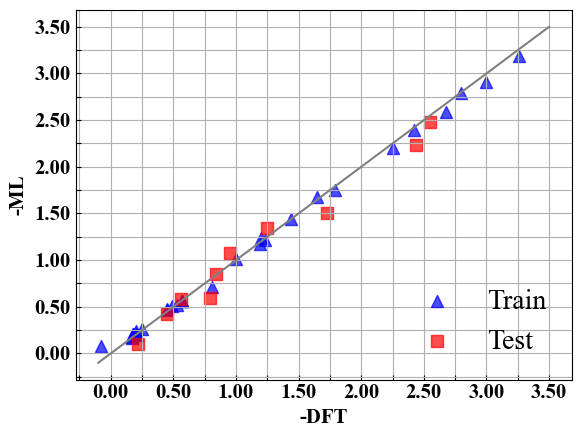

In [32]:
plt.scatter(-train_real_scatter,-train_pre_scatter,color = "blue",marker = "^",alpha = 0.7,s=75,label = "Train")
plt.scatter(-test_real_scatter,-test_pre_scatter,color = "red",marker = "s",alpha = 0.7,s = 75,label = "Test")
#这里预测结果每次运行都会上下浮动一点，但整体趋势和交叉验证的指标一致
plt.xlabel("-DFT",fontsize=15,fontweight = "bold")
plt.ylabel("-ML",fontsize=15,fontweight = "bold")
plt.tick_params(direction = "in")
plt.locator_params(axis = "x",nbins=16)
plt.locator_params(axis = "y",nbins=16)
plt.gca().set_xticklabels(["0", "", "0.00", "", "0.50", "", "1.00", "", "1.50", "", "2.00", "", "2.50", "", "3.00", "", "3.50"],
                          fontsize=15, fontweight="bold")
plt.gca().set_yticklabels(["0", "", "0.00", "", "0.50", "", "1.00", "", "1.50", "", "2.00", "", "2.50", "", "3.00", "", "3.50"],
                          fontsize=15, fontweight="bold")

plt.grid(True)
plt.legend(fontsize=20,frameon=False,loc="lower right")
#plt.savefig(r'C:\Users\26482\Desktop\Mo2C_data_eassy\scatter_hd.png', dpi=2000,facecolor= "white")
plt.plot([-0.1,3.5],[-0.1,3.5],color="grey")
plt.show()


In [33]:
#定义预测函数.稍微改变一下
def model_predict_all(model,y,X_data):
    result = model.predict(X_data)
    y_pred = result*(y.max()-y.min())+y.min()
    y_pred = y_pred.reshape(-1)
    return y_pred

In [34]:
df1_pre = model_predict_all(bpnn,y,df1)
df2_pre = model_predict_all(bpnn,y,df2)

2/2 [==============================] - 0s 3ms/step


In [45]:
#将所有预测值合并
all_pre = []

for i in range(26):
    if i in [2,4,5,8,11,13,16,20,23,25]:
        all_pre.append(list(df1_pre.reshape(-1,4)[[2,4,5,8,11,13,16,20,23,25].index(i)]))
    else:
        all_pre.append(list(df2_pre.reshape(-1,4)[[0,1,3,6,7,9,10,12,14,15,17,18,19,21,22,24].index(i)]))
all_pre  = pd.DataFrame(all_pre)
all_pre.index = pri_feature.iloc[[i for i in range(26)],:].index
all_pre.columns = ["CO","H2S","CH4","C2H6"]
#这里的预测结果每次运行都会上下浮动一点
all_pre.to_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\all_pre.xlsx")

In [46]:
#将40DFT+60pre合并用来制作热图
#将所有预测值合并
DFT_pre = []

for i in range(26):
    if i in [2,4,5,8,11,13,16,20,23,25]:
        DFT_pre.append(list(y.reshape(-1,4)[[2,4,5,8,11,13,16,20,23,25].index(i)]))
    else:
        DFT_pre.append(list(df2_pre.reshape(-1,4)[[0,1,3,6,7,9,10,12,14,15,17,18,19,21,22,24].index(i)]))
DFT_pre  = pd.DataFrame(DFT_pre)
DFT_pre.index = pri_feature.iloc[[i for i in range(26)],:].index
DFT_pre.columns = ["CO","H2S","CH4","C2H6"]
#这里的预测结果每次运行都会上下浮动一点，本文随机取了一种
DFT_pre.to_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\DFT_pre.xlsx")

In [37]:
DFT_pre = pd.read_excel(r"C:\Users\Administrator\Desktop\Mo2C_data_eassy\DFT_pre.xlsx",index_col = 0)

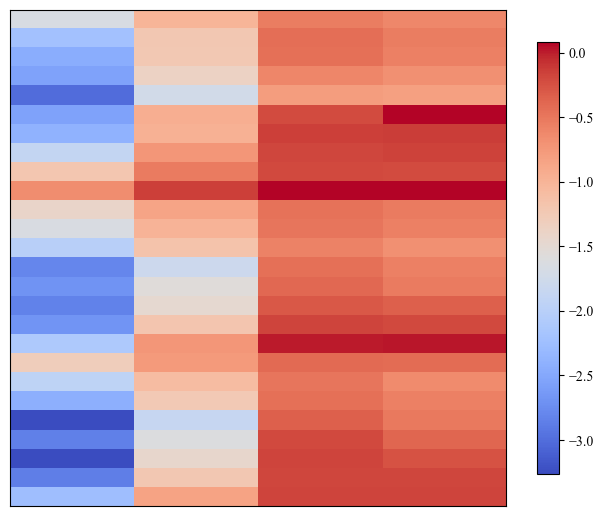

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(DFT_pre,cmap="coolwarm",interpolation = "nearest",extent=[0,4,0,4])
plt.tick_params(axis="x",which="both",bottom=False,top=False,labelbottom = False)
plt.tick_params(axis="y",which="both",left=False,right=False,labelleft = False)
#plt.gca().set_xticklabels(["","CO","","$H_2$S","","C$H_4$","","$C_2$$H_6$"],fontsize=15,fontweight = "bold")
#plt.gca().set_yticklabels(["","Sc","","Ti","","V","","Cr","","Mn","","Fe","","Co","","Ni","","Cu","","Zn","","Y","","Zr","","Nb","","Mo","","Tc","","Ru","","Rh","","Pd","","Ag","","Hf","","Ta","","W","","Re","","Os","","Ir","","Pt"]
                          #,fontsize=15,fontweight = "bold")
plt.colorbar(shrink = 0.7)
#plt.savefig(r'C:\Users\Administrator\Desktop\Mo2C_data_eassy\heatmap.png', dpi=2000,facecolor= "white")
plt.show()

In [39]:
DFT_pre

,CO,H2S,CH4,C2H6
Sc,-1.668248,-1.004386,-0.541651,-0.618191
Ti,-2.205563,-1.224349,-0.431637,-0.538580
V,-2.440000,-1.230000,-0.450000,-0.570000
Cr,-2.550478,-1.377117,-0.598539,-0.683421
Mn,-3.000000,-1.730000,-0.790000,-0.810000
Fe,-2.550000,-0.950000,-0.220000,0.080000
Co,-2.387134,-0.967664,-0.154730,-0.130363
Ni,-1.887271,-0.731077,-0.187407,-0.164564
Cu,-1.200000,-0.530000,-0.200000,-0.210000
Zn,-0.662265,-0.148286,0.070650,0.076509


In [40]:
import shap
# 创建 SHAP 的 DeepExplainer 对象
explainer = shap.DeepExplainer(bpnn, X_train.values)
# 计算 SHAP 值
shap_values = explainer.shap_values(df1.values)
# shap_values 包含了每个特征对预测结果的贡献，可以进一步分析和可视化


In [41]:
feat_names = list(df1.columns)

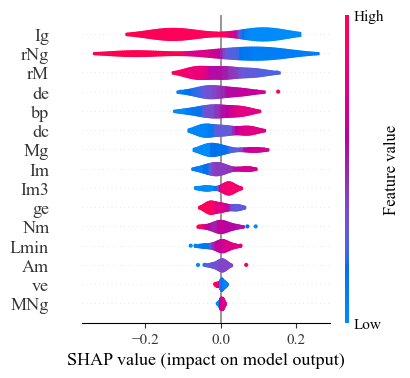

In [42]:
shap.plots.violin(
    shap_values[0], features=df1, feature_names=feat_names, plot_type="violin",plot_size=(4,4),max_display = 15
)
#不知道为什么保存失败，直接截的图

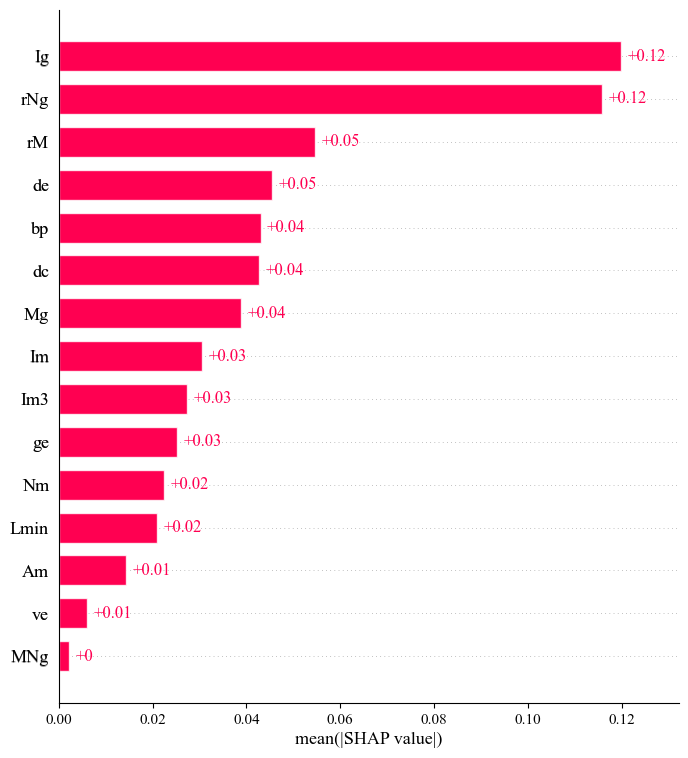

In [43]:
shap_exp = shap.Explanation(shap_values[0],feature_names=df1.columns)
shap.plots.bar(shap_exp,max_display = 15)

In [44]:
#由于SHAP的默认设置只输出两位小数，后续使用上述精度不够，调整一下精度，最终使用了如下的SHAP值结果
a =np.mean(np.abs(shap_values[0]), axis=0)
b =df1.columns
for i in range(15):
    print(b[i],a[i])

rM 0.05459013394798551
Nm 0.022377592907122094
Im 0.030562138829845997
dc 0.04268885016591213
Am 0.014337015127127298
Im3 0.027300402739877033
bp 0.042987408776675146
Lmin 0.020862112693827258
de 0.04542620145577262
Mg 0.0387931757171117
Ig 0.11987567841643787
rNg 0.11577786333989763
MNg 0.0021278489276851486
ve 0.00608773193241278
ge 0.025259171383909606
